In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [7]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 82.8MB/s]


In [8]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# EDA

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [15]:
df.PassengerId.nunique()

8693

# Analyse Home Planet Variable 
- Categorical Variable

In [16]:
df.HomePlanet.isnull().sum()

201

In [17]:
df.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

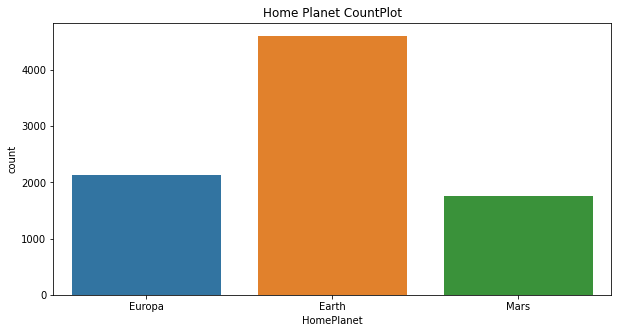

In [19]:
plt.figure(figsize = (10,5))
plt.title('Home Planet CountPlot')
sns.countplot(x = 'HomePlanet', data = df)
plt.show()

# Analyse CryoSleep Variable
*   Categorical object




In [20]:
df.CryoSleep.isnull().sum() / df.CryoSleep.sum()

0.07145209087915706

In [21]:
df.CryoSleep.head()

0    False
1    False
2    False
3    False
4    False
Name: CryoSleep, dtype: object

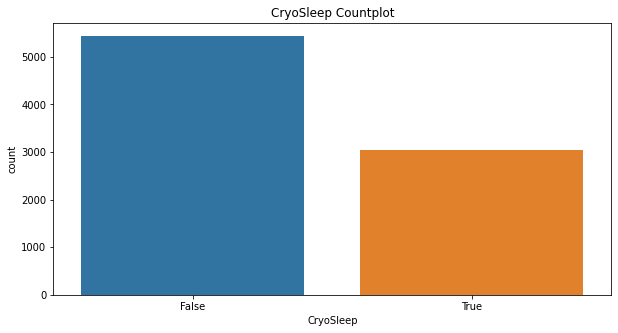

In [22]:
plt.figure(figsize = (10,5))
plt.title('CryoSleep Countplot')
sns.countplot(x = 'CryoSleep', data = df)
plt.show()

# Analyse Cabin
*   A ton of different values



In [23]:
df.Cabin.head(2)

0    B/0/P
1    F/0/S
Name: Cabin, dtype: object

In [24]:
df.Cabin.isnull().sum() / df.shape[0]

0.02289198205452663

In [25]:
df.head(17)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# Analyse Destination

In [26]:
df.Destination.isnull().sum()

182

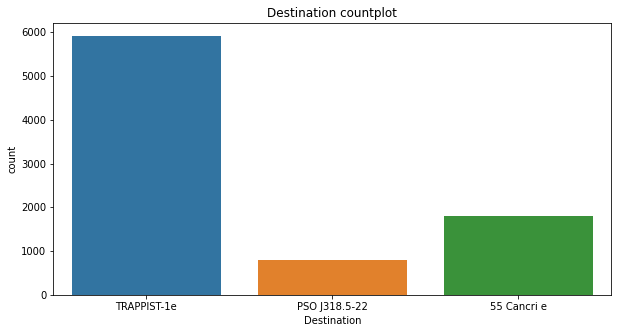

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,5))
plt.title('Destination countplot')
sns.countplot(x = 'Destination', data = df)
plt.show()

# Analyse Age

In [28]:
df.Age.isnull().sum() / df.shape[0]

0.020591280340503854

In [29]:
df.Age.mean()

28.82793046746535

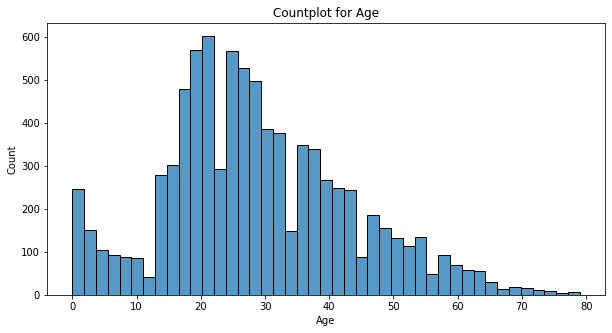

In [30]:
plt.figure(figsize=(10,5))
plt.title('Countplot for Age')
sns.histplot(data = df, x = 'Age')
plt.show()

# Analyse VIP variable

In [31]:
df.VIP.isnull().sum()

203

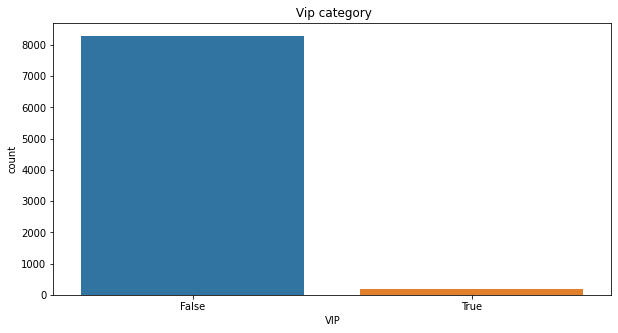

In [32]:
plt.figure(figsize = (10,5))
plt.title(' Vip category')
sns.countplot(x = 'VIP', data = df)
plt.show()

# Analyse RoomService

In [33]:
df.RoomService.head()

0      0.0
1    109.0
2     43.0
3      0.0
4    303.0
Name: RoomService, dtype: float64

In [34]:
df.RoomService.isnull().sum()

181

In [35]:
room_mean = df.RoomService.mean()

# Analyse FoodCourt

In [36]:
df.FoodCourt.head()

0       0.0
1       9.0
2    3576.0
3    1283.0
4      70.0
Name: FoodCourt, dtype: float64

In [37]:
df.FoodCourt.isnull().sum()

183

In [38]:
food_mean = df.FoodCourt.mean()

# Analyse ShoppingMall

In [39]:
df.ShoppingMall.head()

0      0.0
1     25.0
2      0.0
3    371.0
4    151.0
Name: ShoppingMall, dtype: float64

In [40]:
df.ShoppingMall.isnull().sum()

208

In [41]:
shopping_mean = df.ShoppingMall.mean()

#Analyse Spa

In [42]:
df.Spa.head()

0       0.0
1     549.0
2    6715.0
3    3329.0
4     565.0
Name: Spa, dtype: float64

In [43]:
df.Spa.isnull().sum()

183

In [44]:
spa_mean = df.Spa.mean()

#Analyse VRDeck

In [45]:
df.VRDeck.head()

0      0.0
1     44.0
2     49.0
3    193.0
4      2.0
Name: VRDeck, dtype: float64

In [46]:
df.VRDeck.isnull().sum()

188

In [47]:
deck_mean = df.VRDeck.mean()

#Analyse Name variable

In [48]:
df.Name.head()

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

In [49]:
df.Name.nunique()

8473

In [50]:
df.Name.isnull().sum()

200

# Analyse Transported

In [51]:
df.Transported.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [52]:
df.Transported.nunique()

2

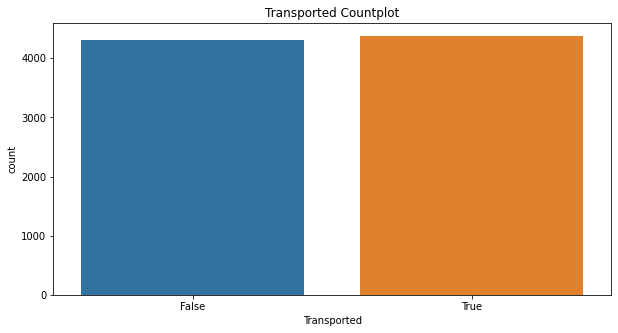

In [53]:
plt.figure(figsize = (10,5))
plt.title('Transported Countplot')
sns.countplot(x = 'Transported', data = df)
plt.show()

# Droping out missing values


In [54]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [55]:
def preproc(df):
  # Drop passangerId
  df.drop('PassengerId', axis = 1, inplace = True )
  # Fill mising categorical values for HomePlanet
  df.HomePlanet.fillna('missing')
  #Fill missing categorical values for CyroSleep
  df.CryoSleep.fillna('missing')
  # Separate Cabin and filling missing values
  df['Deck'] = df.Cabin
  df['Num'] = df.Cabin
  df['Side'] = df.Cabin
  for i in range (0,df.shape[0]) :
    til = str(df.Cabin[i]).split('/')
    if(len(til) == 3):
      df['Deck'][i] = str(til[0])
      df['Num'][i]  = str(til[1])
      df['Side'][i] = str(til[2])
    else:
      df['Deck'][i] = 'Missing'
      df['Num'][i]  = 'Missing'
      df['Side'][i] = 'Missing'
  #Fill missing values for Destinations
  df.Destination.fillna('Missing')
  #Fill missing values for Age
  df.Age.fillna(29)
  #Fill missing values for VIP
  df.VIP.fillna(False)
  #Fill missing values for Room Service
  df.RoomService.fillna(df.RoomService.mean())
  #Fill missing values for FoodCourt
  df.FoodCourt.fillna(df.FoodCourt.mean())
  #Fill missing valuess for ShoppingMall
  df.ShoppingMall.fillna(df.ShoppingMall.mean())
  #Fill missing values for Spa
  df.Spa.fillna(df.Spa.mean())
  #Fill missing values for VRDeck
  df.VRDeck.fillna(df.VRDeck.mean())
  #Fill missing values for Name
  df.Name.fillna('Missing')

In [ ]:
preproc(df)

In [57]:
df.drop(['Cabin'], axis = 1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [58]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [59]:
import sklearn

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

In [ ]:
tr = le.fit_transform(df[['HomePlanet']])

In [63]:
df.HomePlanet = tr

In [ ]:
tr = le.fit_transform(df[['CryoSleep']])

In [65]:
df.CryoSleep = tr

In [66]:
df = df.drop('Cabin', axis = 1)

In [ ]:
tr = le.fit_transform(df[['Destination']])

In [68]:
df.Destination = tr

In [ ]:
tr = le.fit_transform(df[['VIP']])

In [70]:
df.VIP = tr

In [71]:
df = df.drop('Name', axis = 1)

In [ ]:
tr = le.fit_transform(df[['Transported']])

In [73]:
df.Transported = tr

In [ ]:
tr = le.fit_transform(df[['Deck']])

In [75]:
df.Deck = tr

In [ ]:
tr = le.fit_transform(df[['Side']])

In [77]:
df.Side = tr

In [ ]:
tr = le.fit_transform(df[['Num']])

In [79]:
df.Num = tr

In [80]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,2
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,2
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,2
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1795,1
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,548,2
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,551,2
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1385,2


In [81]:
df.Age = df.Age.fillna(df.Age.mean())

In [82]:
df.RoomService = df.RoomService.fillna(df.RoomService.mean())

In [83]:
df.RoomService.isnull().sum()

0

In [84]:
df.FoodCourt = df.FoodCourt.fillna(df.FoodCourt.mean())

In [85]:
df.ShoppingMall = df.ShoppingMall.fillna(df.ShoppingMall.mean())

In [86]:
df.Spa = df.Spa.fillna(df.Spa.mean())

In [87]:
df.VRDeck = df.VRDeck.fillna(df.VRDeck.mean())

In [88]:
target = df.Transported

In [89]:
target

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [90]:
df1 = df.drop('Transported', axis = 1)

In [91]:
df.ShoppingMall.isnull().sum()

0

In [92]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
model.fit(df1, target)

RandomForestClassifier(criterion='entropy', random_state=42)

In [93]:
model.score(df1, target)

0.9995398596571955

In [94]:
dff = pd.read_csv('test.csv')

In [95]:
pasangers = dff.PassengerId

In [96]:
pasangers

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [97]:
dff


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [98]:
def preproc(df):
  # Drop passangerId
  df.drop('PassengerId', axis = 1, inplace = True )
  # Fill mising categorical values for HomePlanet
  df.HomePlanet.fillna('missing')
  #Fill missing categorical values for CyroSleep
  df.CryoSleep.fillna('missing')
  # Separate Cabin and filling missing values
  df['Deck'] = df.Cabin
  df['Num'] = df.Cabin
  df['Side'] = df.Cabin
  for i in range (0,df.shape[0]) :
    til = str(df.Cabin[i]).split('/')
    if(len(til) == 3):
      df['Deck'][i] = str(til[0])
      df['Num'][i]  = str(til[1])
      df['Side'][i] = str(til[2])
    else:
      df['Deck'][i] = 'Missing'
      df['Num'][i]  = 'Missing'
      df['Side'][i] = 'Missing'
  #Fill missing values for Destinations
  df.Destination.fillna('Missing')
  #Fill missing values for Age
  df.Age = df.Age.fillna(29)
  #Fill missing values for VIP
  df.VIP = False
  #Fill missing values for Room Service
  df.RoomService = df.RoomService.fillna(df.RoomService.mean())
  #Fill missing values for FoodCourt
  df.FoodCourt = df.FoodCourt.fillna(df.FoodCourt.mean())
  #Fill missing valuess for ShoppingMall
  df.ShoppingMall = df.ShoppingMall.fillna(df.ShoppingMall.mean())
  #Fill missing values for Spa
  df.Spa = df.Spa.fillna(df.Spa.mean())
  #Fill missing values for VRDeck
  df.VRDeck = df.VRDeck.fillna(df.VRDeck.mean())
  #Fill missing values for Name
  df.Name.fillna('Missing')

In [ ]:
preproc(dff)

In [ ]:
tr = le.fit_transform(dff[['HomePlanet']])
dff.HomePlanet = tr
tr = le.fit_transform(dff[['CryoSleep']])
dff.CryoSleep = tr
dff = dff.drop('Cabin', axis = 1)
tr = le.fit_transform(dff[['Destination']])
dff.Destination = tr
tr = le.fit_transform(dff[['VIP']])
dff.VIP = tr
dff = dff.drop('Name', axis = 1)
tr = le.fit_transform(dff[['Deck']])
dff.Deck = tr
tr = le.fit_transform(dff[['Side']])
dff.Side = tr
tr = le.fit_transform(dff[['Num']])
dff.Num = tr
dff.RoomService = dff.RoomService.mean()
dff.FoodCourt = dff.FoodCourt.mean()
dff.ShoppingMall = dff.ShoppingMall.mean()
dff.Spa = dff.Spa.mean()
dff.VRDeck = dff.VRDeck.mean()

In [101]:
arr = model.predict(dff)

In [102]:
arr[1:5]

array([0, 1, 0, 0])

In [103]:
def to_bool(arr, arr1):
  for i in range(0, len(arr)):
     if arr[i] == 0 :
       arr1.append(False)
     else :
       arr1.append(True)


In [104]:
arr1 = []

In [105]:
to_bool(arr,arr1)

In [106]:
arr1[1:5]

[False, True, False, False]

In [107]:
import numpy as np

In [108]:
data_array = {'PassengerId': pasangers, 'Transported': arr1}

In [110]:
df_predicted = pd.DataFrame(data=data_array, index = None)

In [117]:
df_predicted.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
df_predicted.to_csv(index=False)

In [113]:
compression_opts = dict(method='zip', archive_name='out2.csv') 

In [114]:

df_predicted.to_csv('out2.zip', index=False,compression=compression_opts)  